In [1]:
from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def kde_segment(samples, bandwidth):
    samples.sort()
    samples = samples.reshape(-1, 1)
    resolution = len(samples) * 10
    span = np.linspace(min(samples), max(samples), resolution)
    
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(samples)
    density = np.exp(kde.score_samples(span.reshape(-1, 1)))

    minima = min(samples) + find_peaks(-density)[0] / resolution * (max(samples)-min(samples))
    print(minima)
    
    plt.figure(1)
    plt.scatter(samples, np.zeros((samples.shape[0],)))
    
    plt.figure(2)
    plt.plot(span, density)
    
    segments = [[]]
    i = 0
    for s in samples:   
        if i < len(minima) and s >= minima[i]:
            segments.append([])
            i += 1
        segments[-1].append(s)
        
    print(segments)

[169.2 338.4]
[[array([90]), array([100]), array([110]), array([110]), array([110]), array([120])], [array([200]), array([210]), array([230])], [array([450])]]
[ 90 100 110 110 110 120 200 210 230 450]


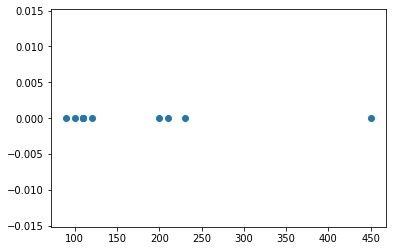

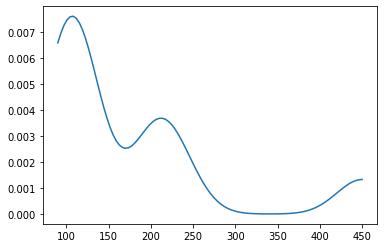

In [3]:
samples = np.array([10, 11, 9, 23, 21, 11, 45, 20, 11, 12]) * 10

kde_segment(samples, 3 * 10)
print(samples)